There are a lot of choices in visualizting data inside of a notebook on Bluemix. I am going to go through the 4 most common options using some simple examples. For perspective here are the options with some pros/cons for each:

 <ul>
  <li><b>matplotlib</b></li>
  Pros: Very easy to use, supported natively with nothing to install
  <br>
  Cons: No interactivity (hovering does not give tooltips), not as attractive as some of the other options
  <li>P<b>lot.ly</b></li>
  Pros: Well documented, interactive display and rich library of charts
  <br>Cons: Requires third party install and connectivity
  <li><b>Bokeh</b></li>
  Pros: Attractive and interactive, open source
  <br>Cons: Requires third party install
  <li><b>Brunel</b></li>
  Pros: Very easy to use, supported natively with nothing to install, attractive and large library of charts
  Cons: Slightly harder to use that some of the others (because it handles the abstraction for you)
</ul> 

In [2]:
#before we get started, let's create a simple Spark Dataframe that contains some data to chart
import random

data = []

for x in range(1,21):
    data.append([x, random.randint(1,100)])

data_rdd = sc.parallelize(data)
print data_rdd.take(2)


[[1, 60], [2, 1]]


In [3]:
from pyspark.sql import Row

data_df = data_rdd.map(lambda x: Row(id=x[0], val=x[1])).toDF()
data_df.show(2)

+---+---+
| id|val|
+---+---+
|  1| 60|
|  2|  1|
+---+---+
only showing top 2 rows



In [4]:
data_df.registerTempTable("data_df")
sqlContext.sql("select * from data_df limit 2").toPandas()

,id,val
0,1,60
1,2,1


<h3>Matplotlib</h3>
One of the easiest to use, very well documents. Taking advantage of the built in plotting capabilies of Pandas you can output Pandas Dataframes to a chart.
<br>
For more documentation and examples reference the Pandas Plotting Documentation here:
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [5]:
#First Import the libraries and set the configuration to display the plot (as opposed to saving it as an image or object)
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

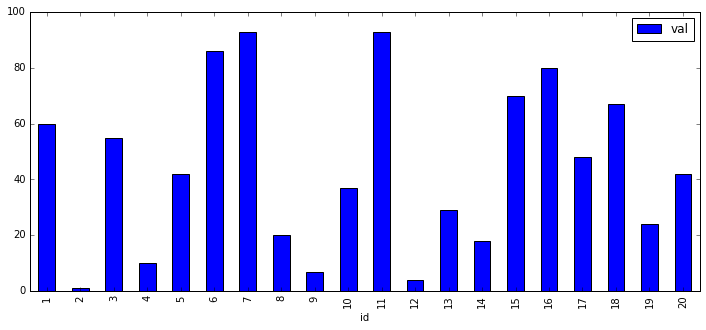

In [6]:
#first we create a Pandas Dataframe, this would normally be the aggregate of a table
data_pandas_df = sqlContext.sql("select * from data_df").toPandas()

#nNow we can "plot" passing the kind, x axis, y axis and size of the output
data_pandas_df.plot(kind='bar', x='id', y='val', figsize=(12, 5))

<h3>Plot.ly</h3>
Plot.ly provides a simple interface that also takes advantage of Pandas.<br>
For documentation visit this page: https://plot.ly/python/offline/

In [24]:
#First you will need to install Plot.ly using Pip

!pip install plotly --user

In [7]:
#to display the chart in the notebook run the following
import plotly
print plotly.__version__
plotly.offline.init_notebook_mode() # run at the start of every notebook

1.12.0


In [8]:
import plotly.graph_objs as go
import plotly.plotly as py

data = [go.Bar(
            x=data_pandas_df["id"],
            y=data_pandas_df["val"]
    )]

py.iplot(data)

<h3>Bokeh</h3>
Bokeh is a great open source solution based on D3.js <br>
Documentation can be found here: http://bokeh.pydata.org/en/latest/

In [36]:
#Like Plot.ly you have to install Bokeh first
!pip install bokeh --user


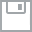
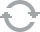
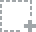
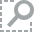
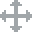
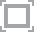
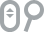
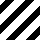
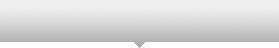
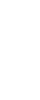
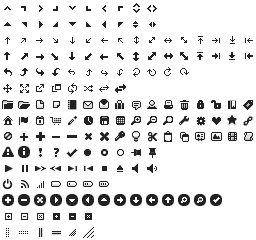
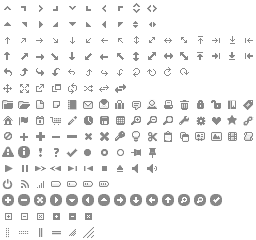
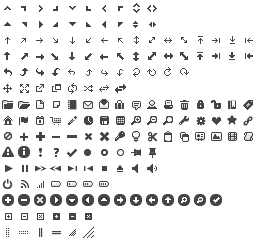
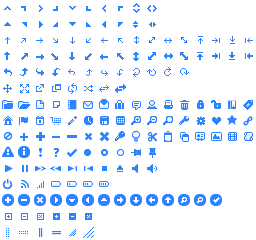
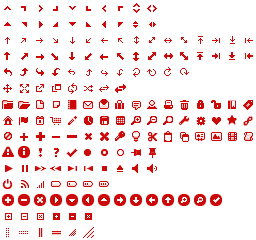
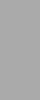
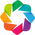
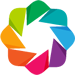

In [17]:
#similar to the other solutions, tell the library to ouput to the notebook
from bokeh.plotting import figure, output_file, show, output_notebook
output_notebook()

In [27]:
from bokeh.charts import Bar

p = Bar(data_pandas_df, 'id', values='val', title="Bokeh Example")
show(p)

<h3>Brunel</h3>
Brunel is also an abstraction fo D3.js, making it easy to take advantage of the open source charts.
Documentation can be found here:
http://brunel.mybluemix.net/docs/


In [31]:
#Since it is supported natively, there is nothing to install just reference your Pandas Datafram
import brunel
%brunel data('data_pandas_df') bar x(id) y(val) :: width=800, height=300

<IPython.core.display.Javascript object>